In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")


In [2]:
data= pd.read_csv(r"C:\Users\DELL\Downloads\kc_house_data.csv")        #import file from CSV & read 
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
data.shape

(21613, 21)

In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
data.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Dropping the Unique Columns

In [10]:
#id is an unique column so we have to drop it
dr= data["id"]
data=data.drop(["id"],axis=1)


In [11]:
dr1= data["date"]
data=data.drop(["date"],axis=1)


In [12]:
dr2= data["yr_built"]
data=data.drop(["yr_built"],axis=1)

In [13]:
dr3= data["yr_renovated"]
data=data.drop(["yr_renovated"],axis=1)

In [14]:
dr4= data["zipcode"]
data=data.drop(["zipcode"],axis=1)

In [15]:
data.shape

(21613, 16)

# Checking the value count of target variable

In [16]:
data.price.value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

## BASE MODEL

In [17]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [18]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [19]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17290, 15), (4323, 15), (17290,), (4323,))

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_p=lr.predict(x_test)
lr_p

array([407933.40898519, 226548.29892349, 563855.37340008, ...,
       649993.35153759, 641287.5754049 , 706224.65392648])

In [21]:
lr.intercept_

-63491421.811857596

In [22]:
lr.coef_

array([-3.01228069e+04,  1.10886583e+04,  1.20098118e+02,  1.77857830e-01,
       -2.65244939e+04,  5.97585094e+05,  5.79596843e+04,  5.58381746e+04,
        8.01410922e+04,  7.85256474e+01,  4.15724695e+01,  6.45432185e+05,
       -2.63299319e+05,  2.59436139e+01, -3.80653090e-01])

In [23]:
#r2=ssr/(ssr+sse)
r2=lr.score(x_train,y_train)
r2

0.6734296713997001

In [24]:
ar2=1-((1-r2)*(17290-1))/(17290-15-1)
ar2

0.6731460917465217

In [25]:
from sklearn import metrics

In [26]:
mse=metrics.mean_squared_error(y_test,lr_p)
mse

43063390889.80692

In [27]:
df=pd.DataFrame({"Actual":y_test,"Predicted":lr_p})
df

,Actual,Predicted
19836,285000.0,407933.408985
10442,239950.0,226548.298923
20548,460000.0,563855.373400
11014,397500.0,440443.598612
4138,545000.0,494623.421590
...,...,...
5625,235000.0,333262.565536
8698,500000.0,422318.945116
9786,850000.0,649993.351538
2784,340000.0,641287.575405


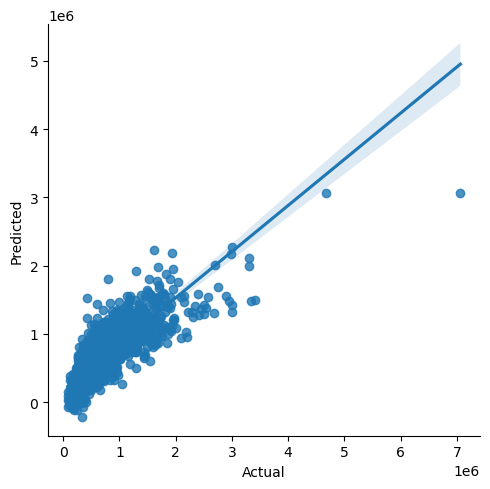

In [28]:
sns.lmplot(data=df,x="Actual",y="Predicted")
plt.show()

# LASSO(L1)

In [29]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
la_p = la.predict(x_test)
la_p

array([407942.17218833, 226556.7827592 , 563865.75568625, ...,
       649993.44973503, 641288.35105721, 706235.90871475])

In [30]:
la.coef_

array([-3.01215202e+04,  1.10783834e+04,  2.80822356e+02,  1.77833417e-01,
       -2.65127993e+04,  5.97439238e+05,  5.79662081e+04,  5.58362758e+04,
        8.01411838e+04, -8.21981489e+01, -1.19138921e+02,  6.45380688e+05,
       -2.63240120e+05,  2.59411427e+01, -3.80692614e-01])

In [31]:
la.intercept_

-63481731.09756294

In [32]:
df1=pd.DataFrame({"importances":list(la.coef_),"columns":list(x)})
df1

,importances,columns
0,-30121.520173,bedrooms
1,11078.383432,bathrooms
2,280.822356,sqft_living
3,0.177833,sqft_lot
4,-26512.799267,floors
5,597439.238324,waterfront
6,57966.208058,view
7,55836.275792,condition
8,80141.183839,grade
9,-82.198149,sqft_above


In [33]:
lar2=la.score(x_train,y_train) #r2
lar2

0.6734296693584286

In [34]:
alr2=1-((1-lar2)*(17290-1))/(17290-15-1)
alr2

0.6731460897034776

In [35]:
mse_la=metrics.mean_squared_error(y_test,la_p)
mse_la

43063247821.200386

In [36]:
df2=pd.DataFrame({"Actual":y_test,"Predicted":la_p})
df2

,Actual,Predicted
19836,285000.0,407942.172188
10442,239950.0,226556.782759
20548,460000.0,563865.755686
11014,397500.0,440438.627012
4138,545000.0,494620.770380
...,...,...
5625,235000.0,333260.867131
8698,500000.0,422313.569714
9786,850000.0,649993.449735
2784,340000.0,641288.351057


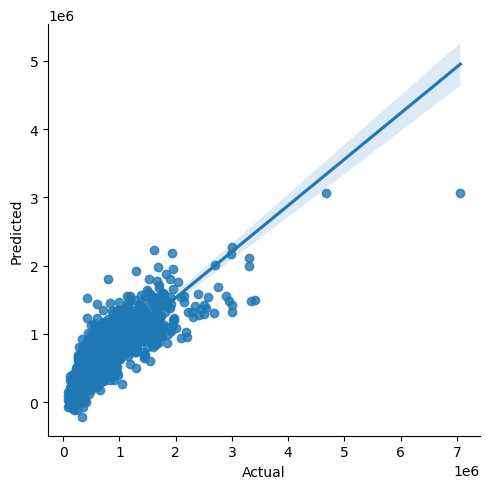

In [37]:
sns.lmplot(data=df2,x="Actual",y="Predicted")
plt.show()

# RIDGE

In [38]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(x_train,y_train)
rd_data=rd.predict(x_test)
rd_data

array([408280.14309638, 227061.00572606, 564161.31408345, ...,
       650015.22737719, 641451.10567377, 706430.92047402])

In [39]:
df3=pd.DataFrame({"importances":list(rd.coef_),"columns":list(x)})
df3

,importances,columns
0,-30157.326172,bedrooms
1,11014.474909,bathrooms
2,120.148903,sqft_living
3,0.177189,sqft_lot
4,-26438.306807,floors
5,592324.388227,waterfront
6,58215.258862,view
7,55832.977171,condition
8,80183.024181,grade
9,78.477959,sqft_above


In [40]:
rdr2=rd.score(x_train,y_train)
rdr2

0.6734277060057725

In [41]:
ardr2=1-((1-rdr2)*(17290-1))/(17290-15-1)  #adjacentr2
ardr2

0.6731441246459303

In [42]:
mse_rd=metrics.mean_squared_error(y_test,rd_data)
mse_rd

43061732021.98098

In [43]:
df4=pd.DataFrame({"Actual":y_test,"Predicted":rd_data})
df4

,Actual,Predicted
19836,285000.0,408280.143096
10442,239950.0,227061.005726
20548,460000.0,564161.314083
11014,397500.0,440149.207788
4138,545000.0,494494.925713
...,...,...
5625,235000.0,333379.039694
8698,500000.0,422018.279449
9786,850000.0,650015.227377
2784,340000.0,641451.105674


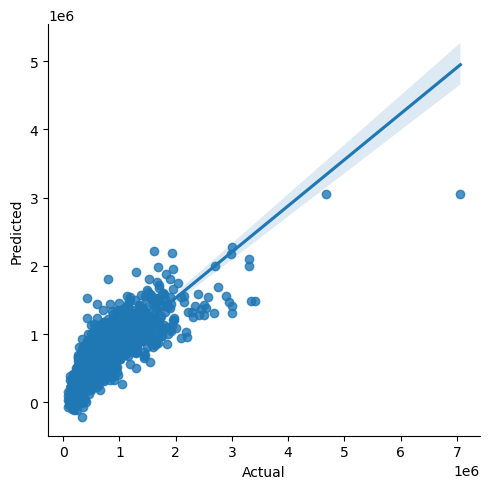

In [44]:
sns.lmplot(data=df4,x="Actual",y="Predicted")
plt.show()

# Random Forest-Regressor 

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_p=rfr.predict(x_test)
rfr_p

array([338363.91, 247750.25, 512380.  , ..., 912636.88, 376686.72,
       803852.35])

In [46]:
rfr_r2=rfr.score(x_train,y_train)
rfr_r2

0.9815300042529711

In [47]:
rfr_ar2=1-((1-rfr_r2)*(17290-1))/(17290-15-1)
rfr_ar2

0.9815139657016103

In [48]:
rfr_mse=metrics.mean_squared_error(y_test,rfr_p)
rfr_mse

16006131262.992569

## Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_p = dtr.predict(x_test)
dtr_p

array([ 348000.,  288000.,  650000., ..., 1081000.,  320000.,  790000.])

In [50]:
dtr_r2 = dtr.score(x_train,y_train)
dtr_r2

0.9992666043859918

In [51]:
n = x_train.shape[0]  # Number of observations
k = x_train.shape[1]  # Number of predictors (features)

In [52]:
dtr_ar2 = 1 - ((1 - dtr_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", dtr_ar2)

Adjusted R square: 0.9992659675367265


In [53]:
dtr_mse = metrics.mean_squared_error(y_test,dtr_p)
dtr_mse

37413204987.2389

# XGB Regressor

In [54]:
from xgboost import XGBRFRegressor
xgbr = XGBRFRegressor()

In [55]:
xgbr.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [56]:
xgbr_p = xgbr.predict(x_test)
xgbr_p

array([338706.28, 274822.4 , 549705.75, ..., 825592.1 , 381934.6 ,
       725221.7 ], dtype=float32)

In [57]:
xgbr_r2 = xgbr.score(x_train,y_train)
xgbr_r2

0.8435272069602753

In [58]:
xgbr_ar2 = 1 - ((1 - xgbr_r2) * (n - 1) / (n - k - 1))
print("Adjusted R square:", xgbr_ar2)

Adjusted R square: 0.8433913327044228


In [59]:
xgbr_mse = metrics.mean_squared_error(y_test,xgbr_p)
xgbr_mse

29782419936.86555

## Correlation

In [60]:
data_corr=data.corr()
data_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.114084,0.198372,0.713202,0.119248


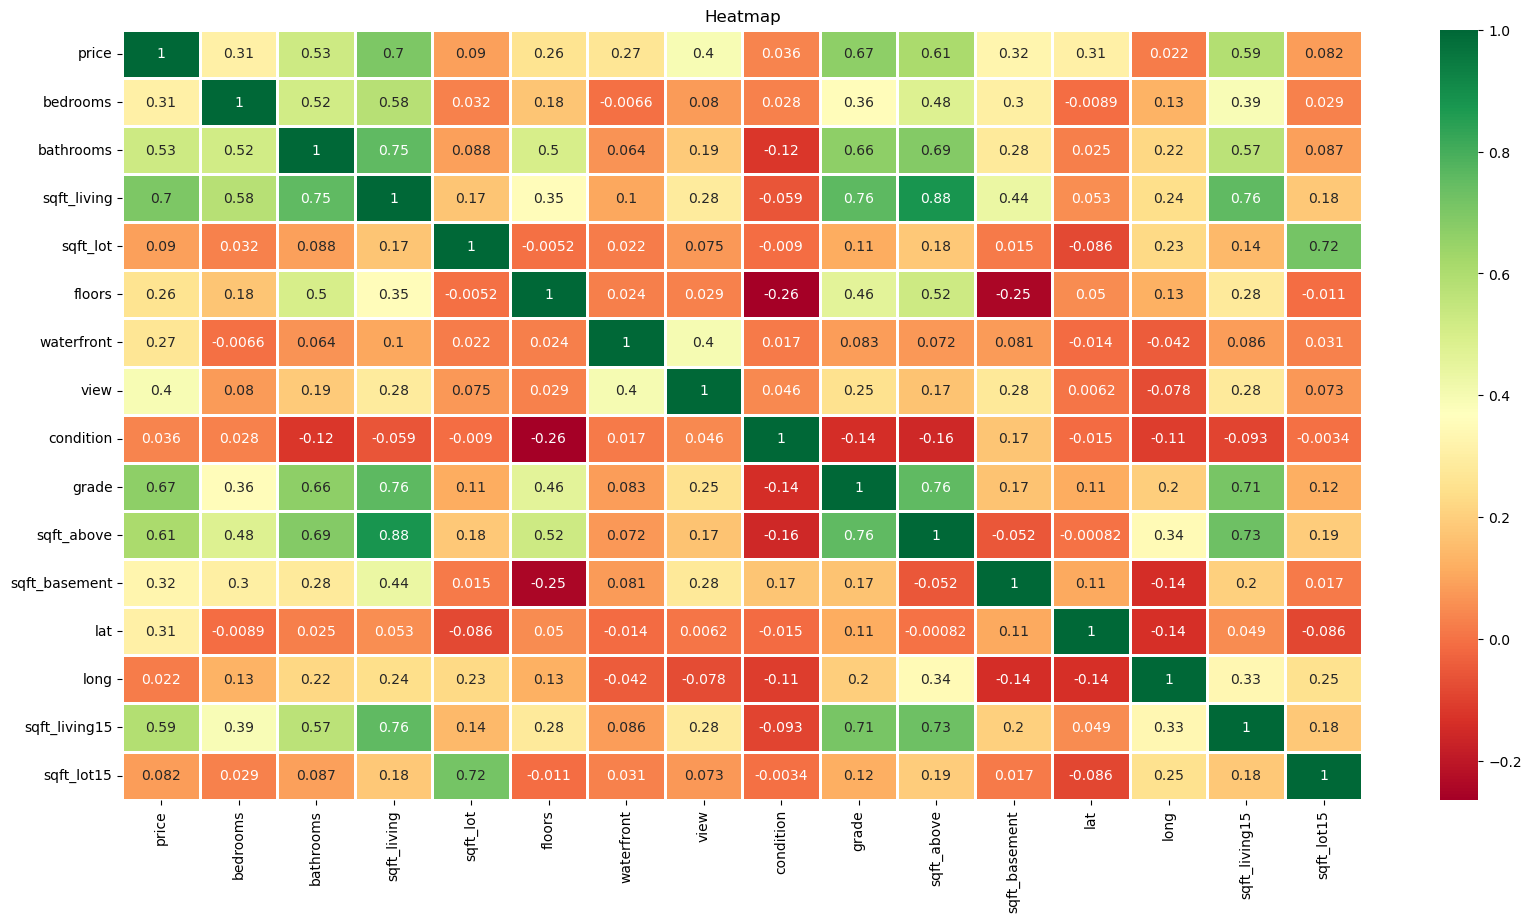

In [61]:
plt.figure(figsize=(20,10))
heatmap=sns.heatmap(data_corr,linewidth=1,annot=True,cmap="RdYlGn")
plt.title("Heatmap")
plt.show()

# Outliers 

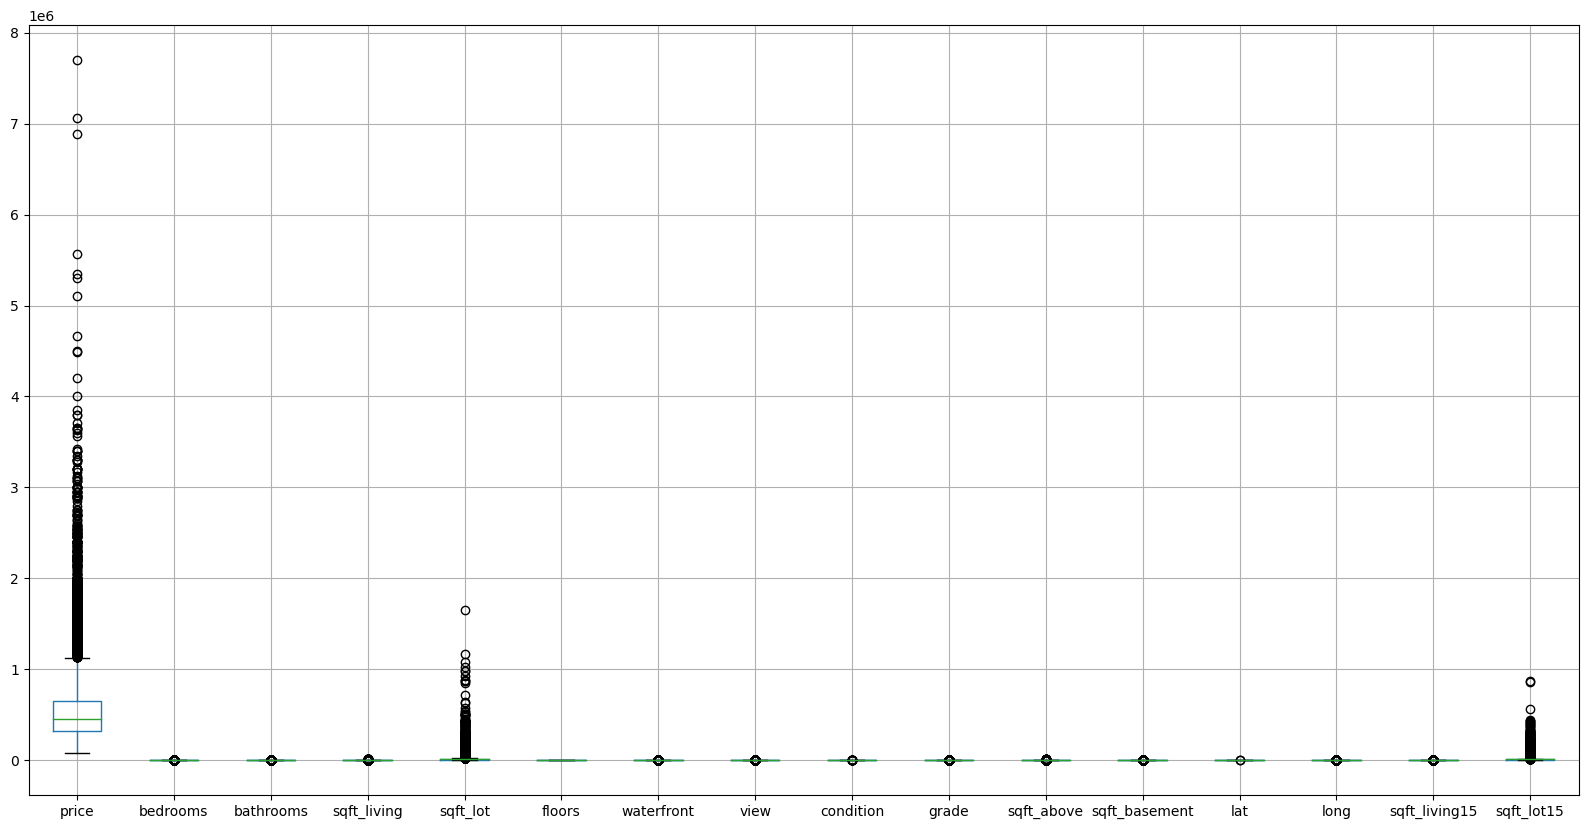

In [62]:
data.boxplot(figsize=(20,10))
plt.show()

In [63]:
#data.sqft_living.value_counts()

In [64]:
#data.sqft_lot.value_counts()

In [65]:
#data.waterfront.value_counts()#categorical

In [66]:
#data.view.value_counts()#categorical

In [67]:
#data.condition.value_counts()#categorical

In [68]:
#data.grade.value_counts()#categorical

In [69]:
#data.sqft_above.value_counts()

In [70]:
#data.sqft_basement.value_counts()

In [71]:
#data.lat.value_counts() #categorical

In [72]:
#data.long.value_counts()#categorical

In [73]:
#data.sqft_living15.value_counts()

In [74]:
#data.sqft_lot15.value_counts()

In [75]:
data.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

## sqft_living

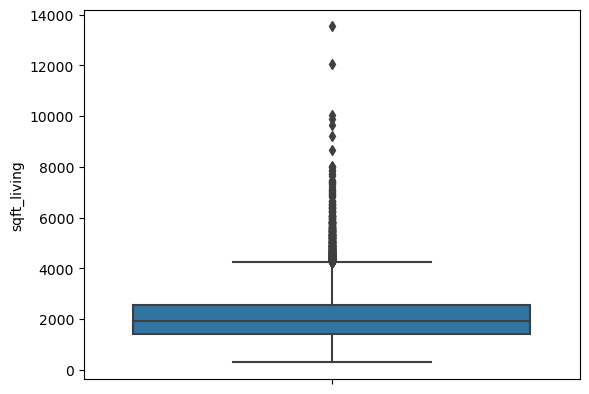

In [76]:
sns.boxplot(data,y="sqft_living")
plt.show()

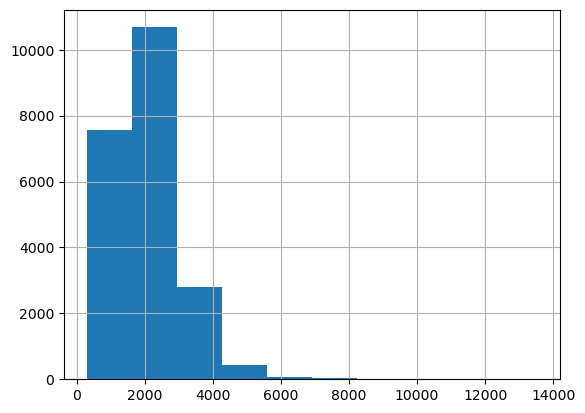

In [77]:
data.sqft_living.hist()
plt.show()

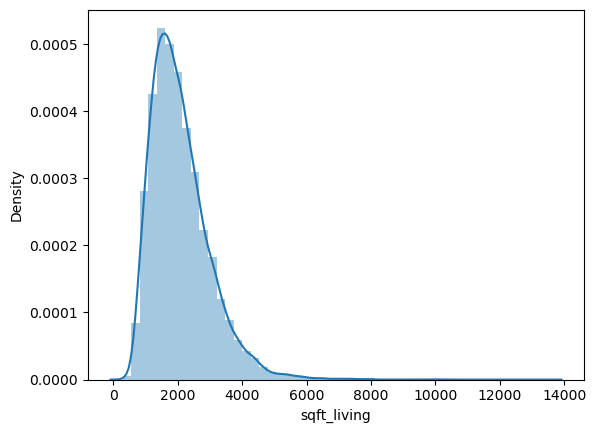

In [78]:
sns.distplot(data["sqft_living"])
plt.show()

In [79]:
data.sqft_living.describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [80]:
#IQR Method
IQR = data.sqft_living.quantile(0.75)- data.sqft_living.quantile(0.25)
IQR


ilb=data["sqft_living"].quantile(0.25)-(IQR*3)# for extreme boundary instead of 1.5 we can take 3
iub=data["sqft_living"].quantile(0.75)+(IQR*3)
ilb,iub


data.loc[data["sqft_living"]>iub,"sqft_living"]=iub

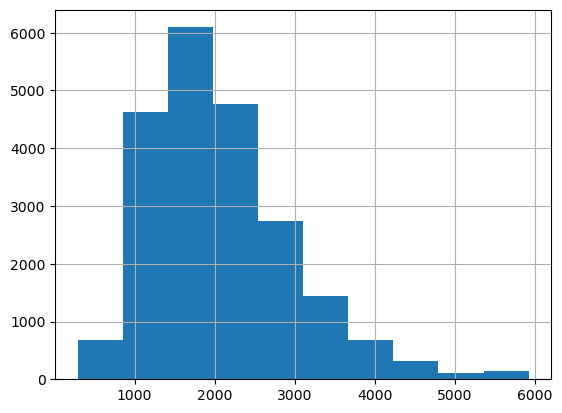

In [81]:
data.sqft_living.hist()
plt.show()

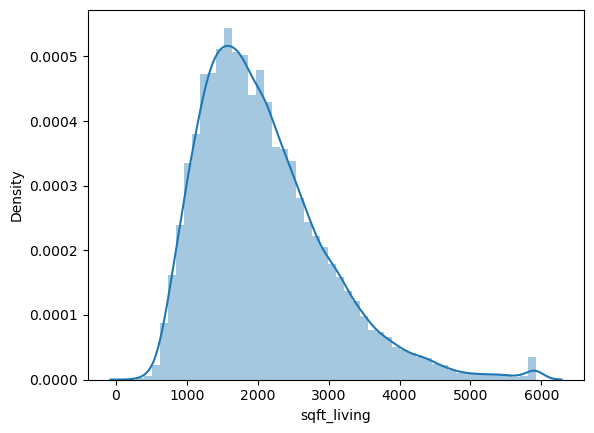

In [82]:
sns.distplot(data["sqft_living"])
plt.show()

## sqft_lot

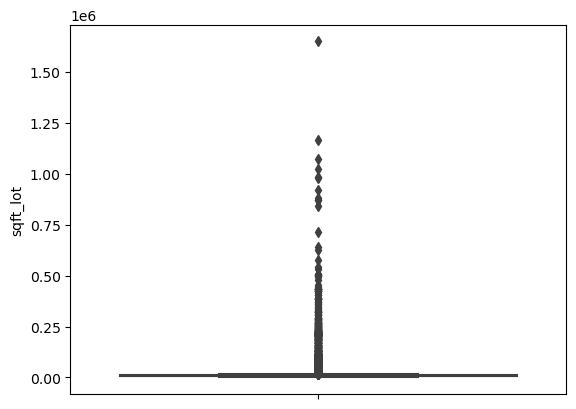

In [83]:
sns.boxplot(data,y="sqft_lot")
plt.show()

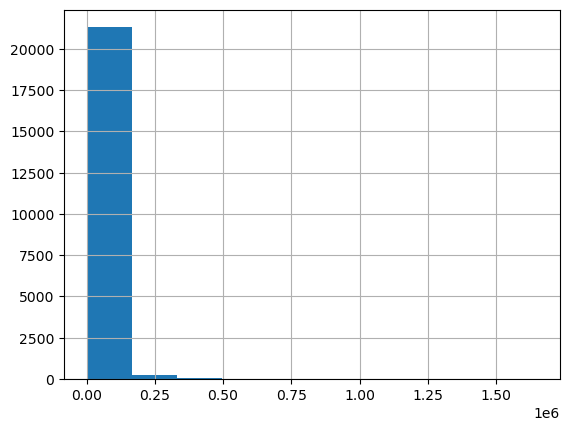

In [84]:
data.sqft_lot.hist()
plt.show()

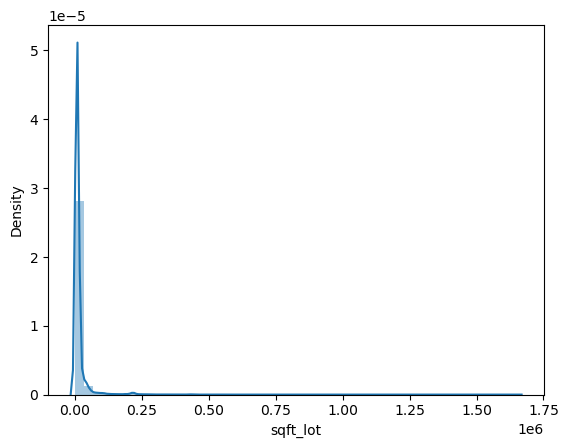

In [85]:
sns.distplot(data["sqft_lot"])
plt.show()

In [86]:
data.sqft_lot.describe()

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [87]:
#IQR Method
IQR1 = data.sqft_lot.quantile(0.75)- data.sqft_lot.quantile(0.25)
IQR1


ilb1=data["sqft_lot"].quantile(0.25)-(IQR1*3)# for extreme boundary instead of 1.5 we can take 3
iub1=data["sqft_lot"].quantile(0.75)+(IQR1*3)
ilb1,iub1


data.loc[data["sqft_lot"]>iub1,"sqft_lot"]=iub1

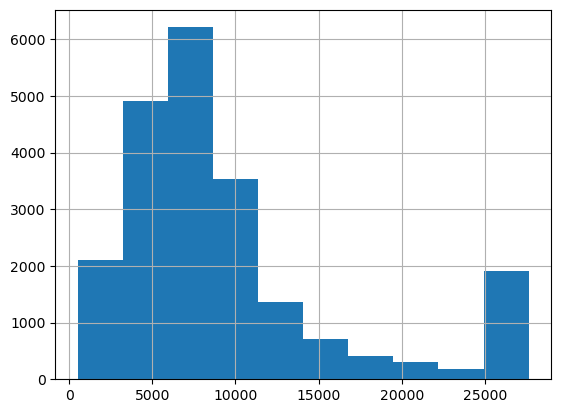

In [88]:
data.sqft_lot.hist()
plt.show()

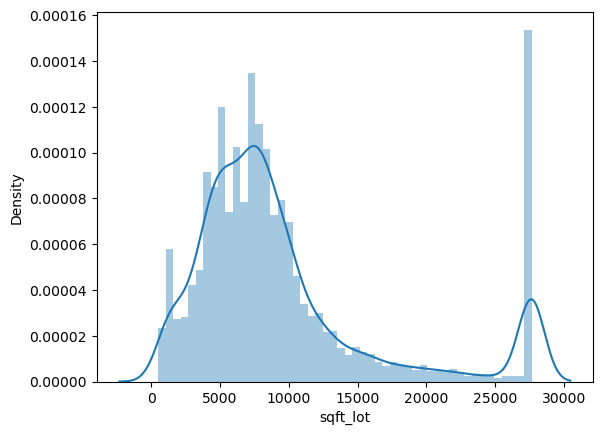

In [89]:
sns.distplot(data["sqft_lot"])
plt.show()

## sqft_above

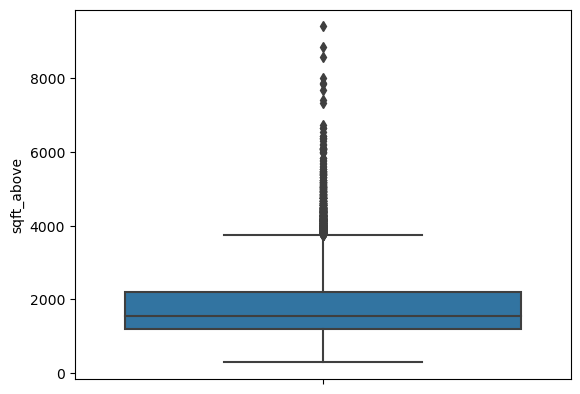

In [90]:
sns.boxplot(data,y="sqft_above")
plt.show()

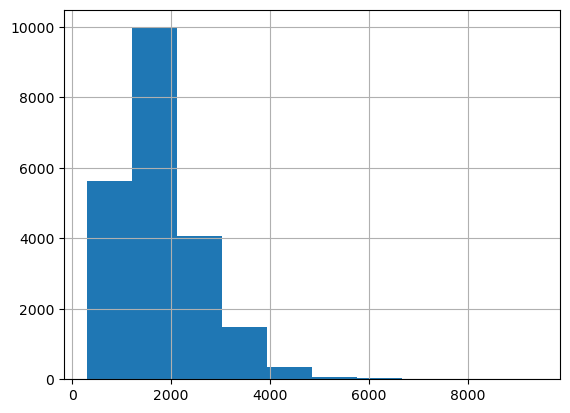

In [91]:
data.sqft_above.hist()
plt.show()

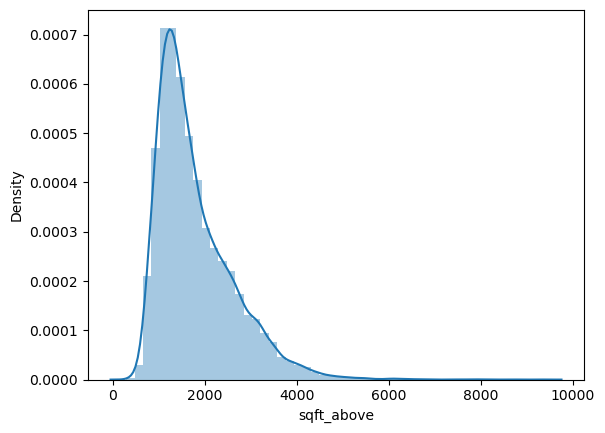

In [92]:
sns.distplot(data["sqft_above"])
plt.show()

In [93]:
data.sqft_above.describe()

count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [94]:
#IQR Method
IQR2 = data.sqft_above.quantile(0.75)- data.sqft_above.quantile(0.25)
IQR2


ilb2=data["sqft_above"].quantile(0.25)-(IQR2*3)# for extreme boundary instead of 1.5 we can take 3
iub2=data["sqft_above"].quantile(0.75)+(IQR2*3)
ilb2,iub2


data.loc[data["sqft_above"]>iub2,"sqft_above"]=iub2

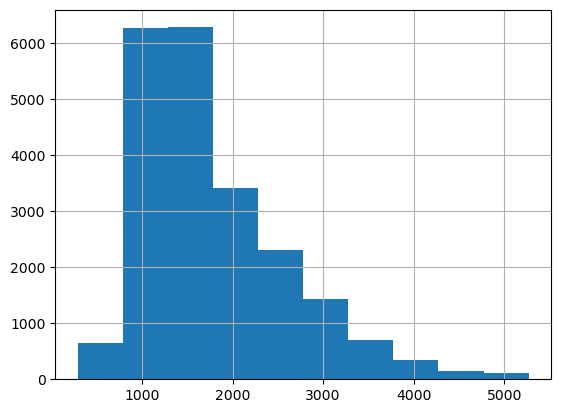

In [95]:
data.sqft_above.hist()
plt.show()

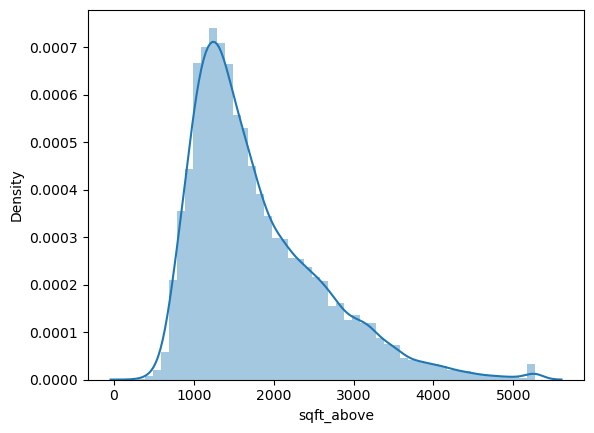

In [96]:
sns.distplot(data["sqft_above"])
plt.show()

## sqft_basement

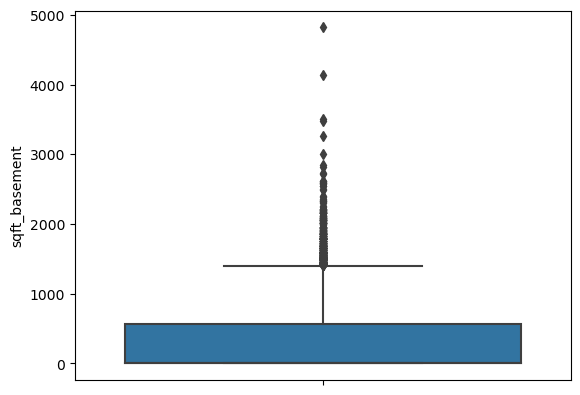

In [97]:
sns.boxplot(data,y="sqft_basement")
plt.show()

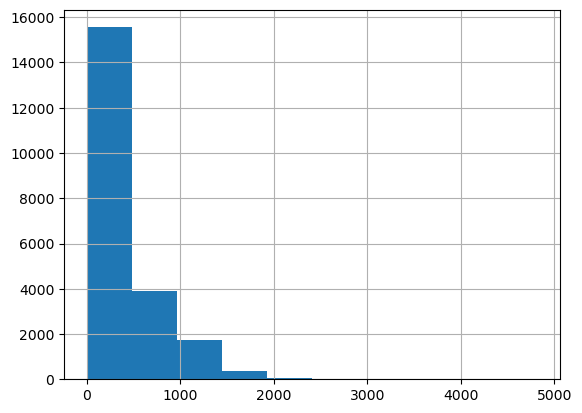

In [98]:
data.sqft_basement.hist()
plt.show()

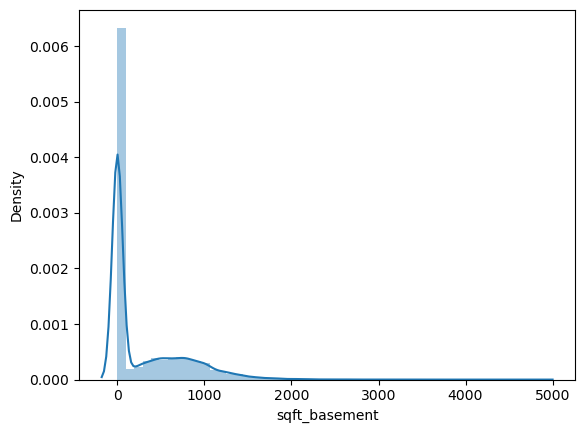

In [99]:
sns.distplot(data["sqft_basement"])
plt.show()

In [100]:
data.sqft_basement.describe()

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [101]:
#IQR Method
IQR3 = data.sqft_basement.quantile(0.75)- data.sqft_lot.quantile(0.25)
IQR3


ilb3=data["sqft_basement"].quantile(0.25)-(IQR3*3)# for extreme boundary instead of 1.5 we can take 3
iub3=data["sqft_basement"].quantile(0.75)+(IQR3*3)
ilb3,iub3


data.loc[data["sqft_basement"]>iub3,"sqft_basement"]=iub3

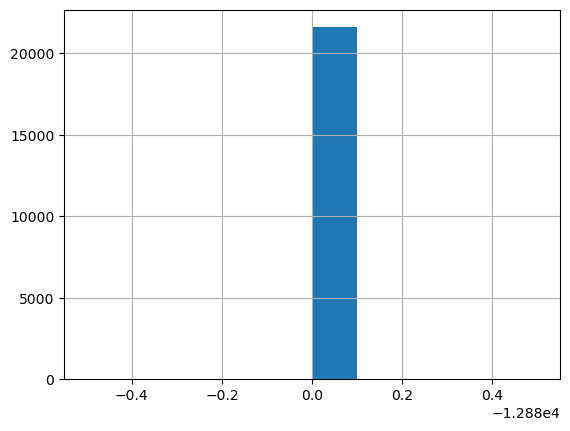

In [102]:
data.sqft_basement.hist()
plt.show()

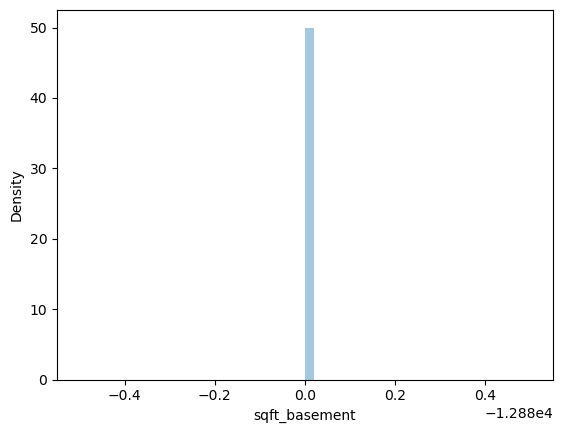

In [103]:
sns.distplot(data["sqft_basement"])
plt.show()

## sqft_living15

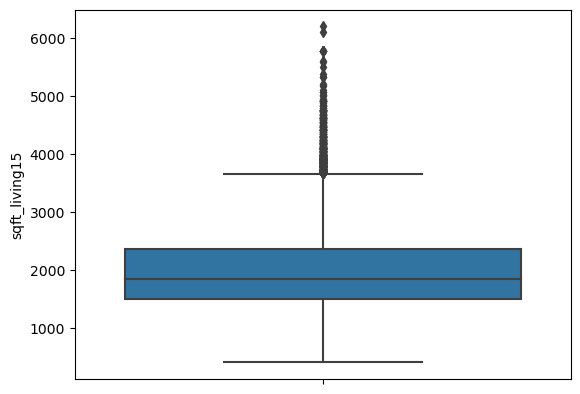

In [104]:
sns.boxplot(data,y="sqft_living15")
plt.show()

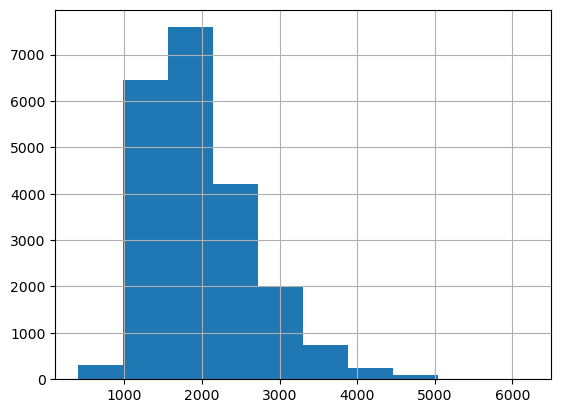

In [105]:
data.sqft_living15.hist()
plt.show()

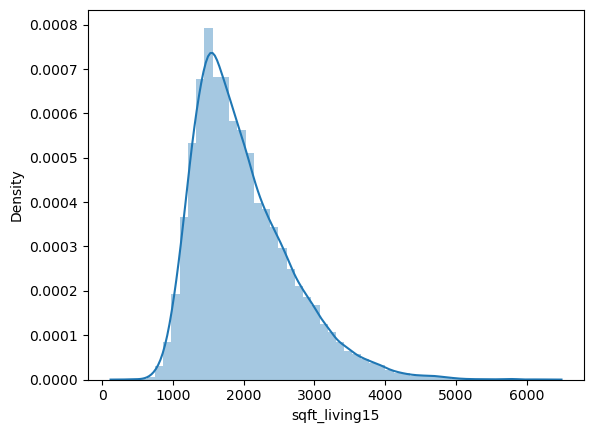

In [106]:
sns.distplot(data["sqft_living15"])
plt.show()

In [107]:
data.sqft_living15.describe()

count    21613.000000
mean      1986.552492
std        685.391304
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

In [108]:
#IQR Method
IQR4 = data.sqft_living15.quantile(0.75)- data.sqft_living15.quantile(0.25)
IQR4


ilb4=data["sqft_living15"].quantile(0.25)-(IQR4*3)# for extreme boundary instead of 1.5 we can take 3
iub4=data["sqft_living15"].quantile(0.75)+(IQR4*3)
ilb4,iub4


data.loc[data["sqft_living15"]>iub4,"sqft_living15"]=iub4

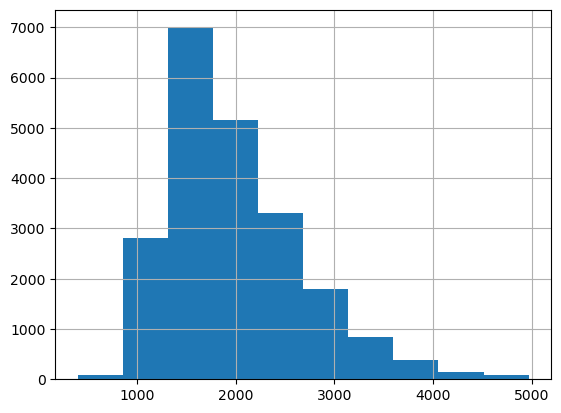

In [109]:
data.sqft_living15.hist()
plt.show()

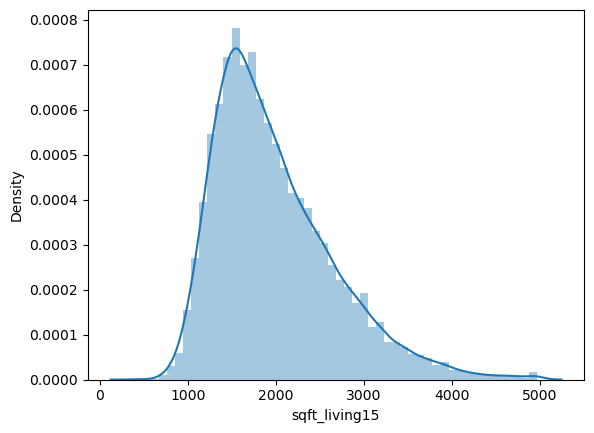

In [110]:
sns.distplot(data["sqft_living15"])
plt.show()

## sqft_lot15

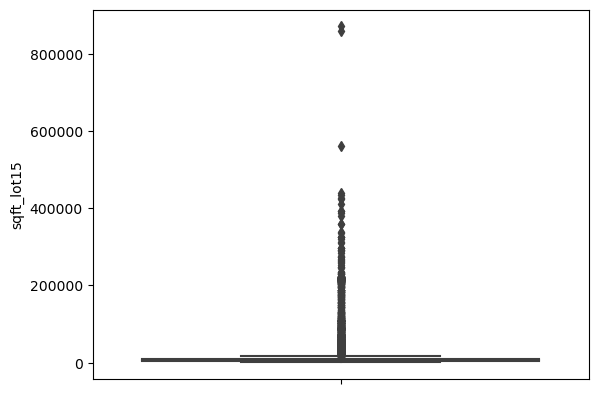

In [111]:
sns.boxplot(data,y="sqft_lot15")
plt.show()

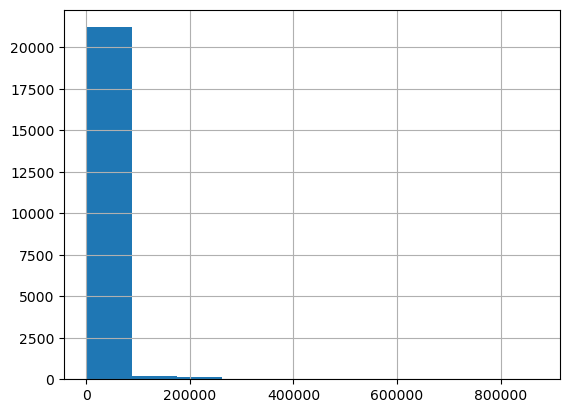

In [112]:
data.sqft_lot15.hist()
plt.show()

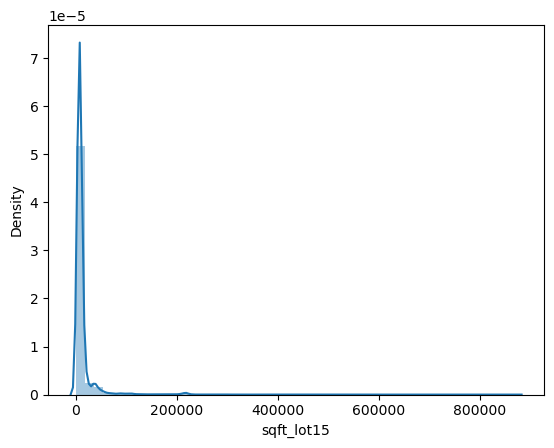

In [113]:
sns.distplot(data["sqft_lot15"])
plt.show()

In [114]:
data.sqft_lot15.describe()

count     21613.000000
mean      12768.455652
std       27304.179631
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

In [115]:
#IQR Method
IQR5 = data.sqft_lot15.quantile(0.75)- data.sqft_lot.quantile(0.25)
IQR5


ilb5=data["sqft_lot15"].quantile(0.25)-(IQR5*3)# for extreme boundary instead of 1.5 we can take 3
iub5=data["sqft_lot15"].quantile(0.75)+(IQR5*3)
ilb5,iub5


data.loc[data["sqft_lot15"]>iub5,"sqft_lot15"]=iub5

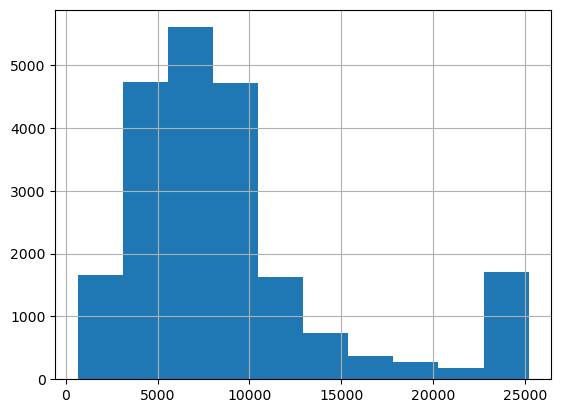

In [116]:
data.sqft_lot15.hist()
plt.show()

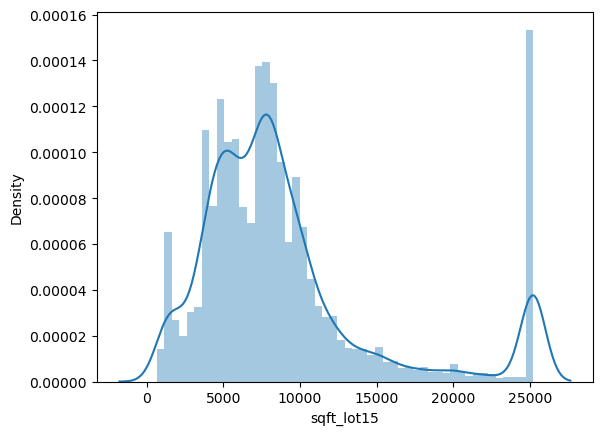

In [117]:
sns.distplot(data["sqft_lot15"])
plt.show()

# Skewness Treatment

In [118]:
data.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.121385
sqft_lot          1.530134
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.244519
sqft_basement     0.000000
lat              -0.485270
long              0.885053
sqft_living15     1.066571
sqft_lot15        1.559021
dtype: float64

In [119]:
data["sqft_living"]=np.sqrt(data["sqft_living"])
data["sqft_lot"]=np.sqrt(data["sqft_lot"])
data["sqft_above"]=np.sqrt(data["sqft_above"])
data["sqft_living15"]=np.sqrt(data["sqft_living15"])
data["sqft_lot15"]=np.sqrt(data["sqft_lot15"])

In [120]:
data.skew()

price             4.024069
bedrooms          1.974300
bathrooms         0.511108
sqft_living       0.509316
sqft_lot          0.781333
floors            0.616177
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        0.723864
sqft_basement     0.000000
lat              -0.485270
long              0.885053
sqft_living15     0.622448
sqft_lot15        0.762997
dtype: float64

# Comparision of Base Model 

In [121]:
list1=["linear Reg","Lasso","Ridge","RandomForest Reg","DecisionTree Reg","XG Regressor"]
list2=[r2,lar2,rdr2,rfr_r2,dtr_r2,xgbr_r2]
list3=[ar2,alr2,ardr2,rfr_ar2,dtr_ar2,xgbr_ar2]
list4=[mse,mse_la,mse_rd,rfr_mse,dtr_mse,xgbr_mse]

In [122]:
final_model= pd.DataFrame({"model name":list1,"r2":list2,"ar2":list3,"mse":list4})
final_model

,model name,r2,ar2,mse
0,linear Reg,0.673430,0.673146,4.306339e+10
1,Lasso,0.673430,0.673146,4.306325e+10
2,Ridge,0.673428,0.673144,4.306173e+10
3,RandomForest Reg,0.981530,0.981514,1.600613e+10
4,DecisionTree Reg,0.999267,0.999266,3.741320e+10
5,XG Regressor,0.843527,0.843391,2.978242e+10


# Feature Selection

In [123]:
#dropping as per Lasso
newx=x.drop(["sqft_lot","sqft_lot15"],axis=1)
newx

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15
0,3,1.00,1180,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340
1,3,2.25,2570,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690
2,2,1.00,770,1.0,0,0,3,6,770,0,47.7379,-122.233,2720
3,4,3.00,1960,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360
4,3,2.00,1680,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,3,8,1530,0,47.6993,-122.346,1530
21609,4,2.50,2310,2.0,0,0,3,8,2310,0,47.5107,-122.362,1830
21610,2,0.75,1020,2.0,0,0,3,7,1020,0,47.5944,-122.299,1020
21611,3,2.50,1600,2.0,0,0,3,8,1600,0,47.5345,-122.069,1410


In [124]:
x_tr,x_te,y_tr,y_te = train_test_split(newx,y,test_size=0.2,random_state=101)
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((17290, 13), (4323, 13), (17290,), (4323,))

# Linear Regression 

In [125]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x_tr,y_tr)
lr1_p=lr1.predict(x_te)
lr1_p

array([381625.89886552, 645082.87775756, 624401.06355362, ...,
        72362.85582329, 379569.86451897,  12824.88050988])

In [126]:
n_r2=lr1.score(x_tr,y_tr)
n_r2

0.6720251384019361

In [127]:
n_ar2=1-((1-n_r2)*(17290-1))/(17290-13-1)
n_ar2

0.6717783409256237

In [128]:
n_mse=metrics.mean_squared_error(y_te,lr1_p)
n_mse

43172312515.49879

In [129]:
df1=pd.DataFrame({"Actual":y_te,"Predicted":lr1_p})
df1

,Actual,Predicted
3834,349950.0,381625.898866
1348,450000.0,645082.877758
20366,635000.0,624401.063554
16617,355500.0,334396.626439
20925,246950.0,91774.411778
...,...,...
6466,455000.0,168039.611970
12560,445000.0,735015.263754
319,268750.0,72362.855823
16682,433000.0,379569.864519


# Lasso

In [130]:
from sklearn.linear_model import Lasso
la1=Lasso()
la1.fit(x_tr,y_tr)
la1_p = la1.predict(x_te)
la1_p

array([381709.86014979, 645065.83412702, 624397.22766536, ...,
        72439.37528183, 379619.35162175,  12899.96644923])

In [131]:
n_lar2=la1.score(x_tr,y_tr)
n_lar2

0.6720244498727379

In [132]:
n_alar2=1-((1-n_lar2)*(17290-1))/(17290-13-1)
n_alar2

0.6717776518783147

In [133]:
nla_mse=metrics.mean_squared_error(y_te,la1_p)
nla_mse

43173138190.189995

# RandomForest Regressor

In [134]:
from sklearn.ensemble import RandomForestRegressor
rfr1 = RandomForestRegressor()
rfr1.fit(x_tr,y_tr)
rfr1_p=rfr1.predict(x_te)
rfr1_p

array([312313.83      , 471405.15      , 652523.5       , ...,
       173018.70666667, 397114.69      , 184024.82666667])

In [135]:
nrfr_r2=rfr1.score(x_tr,y_tr)
nrfr_r2

0.9817381712464547

In [136]:
nrfr_ar2=1-((1-nrfr_r2)*(17290-1))/(17290-13-1)
nrfr_ar2

0.9817244294211597

In [137]:
nrfr_mse=metrics.mean_squared_error(y_te,rfr1_p)
nrfr_mse

17193262971.851326

# DecisionTree Regressor

In [138]:
from sklearn.tree import DecisionTreeRegressor
dtr1 = DecisionTreeRegressor()
dtr1.fit(x_tr,y_tr)
dtr1_p = dtr1.predict(x_te)
dtr1_p

array([227000., 540000., 619000., ..., 110000., 379784., 210000.])

In [139]:
ndtr_r2=dtr1.score(x_tr,y_tr)
ndtr_r2

0.999312431291166

In [140]:
ndtr_ar2=1-((1-ndtr_r2)*(17290-1))/(17290-13-1)
ndtr_ar2

0.9993119139032745

In [141]:
ndtr_mse=metrics.mean_squared_error(y_te,dtr1_p)
ndtr_mse

31710599365.06292

# XGB  Regressor

In [142]:
from xgboost import XGBRFRegressor
xgbr1 = XGBRFRegressor()
xgbr1.fit(x_tr,y_tr)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [143]:
xgbr1_p=xgbr1.predict(x_te)
xgbr1_p

array([326553.4 , 521630.72, 693717.4 , ..., 228952.8 , 474554.56,
       228952.8 ], dtype=float32)

In [144]:
nxgbr_r2=xgbr1.score(x_tr,y_tr)
nxgbr_r2

0.838882167114019

In [145]:
nxgbr_ar2=1-((1-nxgbr_r2)*(17290-1))/(17290-13-1)
nxgbr_ar2

0.8387609277167327

In [146]:
nxgbr_mse=metrics.mean_squared_error(y_te,xgbr1_p)
nxgbr_mse

23362009647.98694

In [147]:
l1=["linear1","Lasso1","RandomForest Reg1","DecisionTree Reg1","XG Regressor1"]
l2=[n_r2,n_lar2,nrfr_r2,ndtr_r2,nxgbr_r2]
l3=[n_ar2,n_alar2,nrfr_ar2,ndtr_ar2,nxgbr_ar2]
l4=[n_mse,nla_mse,nrfr_mse,ndtr_mse,nxgbr_mse]

In [148]:
final_model2= pd.DataFrame({"model name":l1,"r2":l2,"ar2":l3,"mse":l4})
final_model2

,model name,r2,ar2,mse
0,linear1,0.672025,0.671778,4.317231e+10
1,Lasso1,0.672024,0.671778,4.317314e+10
2,RandomForest Reg1,0.981738,0.981724,1.719326e+10
3,DecisionTree Reg1,0.999312,0.999312,3.171060e+10
4,XG Regressor1,0.838882,0.838761,2.336201e+10
